# CAPSTONE PROJECT DSFT8 - Amazon instant video

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## &#10148;Problem Statement </br> 
### <div class="alert alert-info">Thomas, a global market analyst, wishes to develop an automated system to analyze and monitor an enormous number of reviews. By monitoring the entire review history of products, he wishes to analyze tone, language, keywords, and trends over time to provide valuable insights that increase the success rate of existing and new products and marketing campaigns.</div>

## Introduction

Everyday we come across various products in our lives, on the digital medium we swipe across hundreds of product choices under one category. It will be tedious for the customer to make selection. Here comes 'reviews' where customers who have already got that product leave a rating after using them and brief their experience by giving reviews. As we know ratings can be easily sorted and judged whether a product is good or bad. But when it comes to sentence reviews we need to read through every line to make sure the review conveys a positive or negative sense. In the era of artificial intelligence, things like that have got easy with the Natural Langauge Processing(NLP) technology.

## Table of contents
 - 1.PREPROCESSING AND CLEANING
 - 2.BUSINESS INSIGHTS AND VISUALIZATION 
 - 3.SENTIMENT ANALYSIS
 - 4.TEXT CLASSIFICATION
 - 5.TIME SERIES ANALYSIS 
 - 6.CLUSTERING
 - 7.PRODUCT RECOMMENDATION
 - 8.PREDICTION OF NEXT PURCHASE DAY
 - 9.CONCLUSION


## &#10148; Requried Libraries</br>

- Importing the required libraries for the project

In [ ]:
import json                                        # to work with json file
import pandas as pd                                # to work with dataframes
import numpy as np                                 # to work with numpy arrays
import gzip                                        # to extract work file from zip file
import nltk                                        # working with nlp algorithms
from nltk.sentiment import SentimentIntensityAnalyzer  # To predict the sentiments based on the text
from tqdm.notebook import tqdm                     # library for adding progress bar
import sklearn                                     # to working with machine learning algorithms
from sklearn.linear_model import LogisticRegression  # Classification algorithm
from sklearn.feature_extraction.text import TfidfVectorizer # To convert text to numerical based on tfidf score
from nltk.corpus import stopwords                  # to detect stopwords
import re                                          # To remove the unwanted text
from sklearn.metrics import classification_report  # Classification report
from sklearn.metrics import accuracy_score         # evaluation metric
from sklearn.metrics import f1_score               # evaluation metric
from sklearn.metrics import recall_score           # evaluation metric
from sklearn.metrics import precision_score        # evaluation metric
from sklearn.model_selection import train_test_split # train test split
import time                                        # to check the processing time
from sklearn.preprocessing import LabelEncoder     # To convert categorical to numerical
import warnings
warnings.filterwarnings('ignore')                  # To ignore the warnings
from sklearn.model_selection import StratifiedKFold # Splitting
from sklearn.naive_bayes import MultinomialNB       # Naive bayes algorithm
import matplotlib.pyplot as plt                     # Visualization tool
import seaborn as sns                               # Visualization tool
from statsmodels.tsa.seasonal import seasonal_decompose            # Time series components
from statsmodels.tsa.stattools import adfuller                      # To find the stationarity of the data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf       # To plot ACF and PACF plots
from statsmodels.tsa.arima.model import ARIMA                       # To build the ARIMA model
from sklearn.metrics import mean_squared_error                      # To check the mean square error                                      
from statsmodels.tsa.statespace.sarimax import SARIMAX              # To build the sarimax model
from sklearn.neighbors import NearestNeighbors                      # KNN algorithm
from sklearn.metrics.pairwise import cosine_similarity              # 
import scipy.sparse
from scipy.sparse import csr_matrix                                 # Correlation Matrix
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler, StandardScaler      # For Scaling the data
from sklearn.cluster import KMeans                                  # For Cluster Formation  
from sklearn.feature_extraction.text import CountVectorizer         # For Vectorisation
from wordcloud import WordCloud, STOPWORDS                          # For Word Cloud
from sklearn import metrics                                         # For Matrics Algorithms
from sklearn.metrics import classification_report                   # For Classification Evaluation Report
from datetime import datetime, timedelta,date
from sklearn.metrics import confusion_matrix                        # It shows the tabel of probability values
from sklearn.metrics import plot_confusion_matrix                   # plot of confusion matrix
from sklearn.metrics import mean_squared_error                      # To check the mean square error 

## &#10148; Converting file from json to dataframe</br>

- The gzip module provides the GzipFile class, as well as the open() , compress() and decompress() convenience functions.

- The Yield keyword in Python is similar to a return statement used for returning values or objects in Python.

In [ ]:
def parse(path):                   # Creating Function
  g = gzip.open(path, 'rb')        # opens the compressed format file
  for l in g:
    yield eval(l)                  # Returns eval(l)

def getDF(path):                   # Creating Function getDF
  i = 0
  df = {}                          # Creating empty dictionary
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')         # .from_dict creates DataFrame object from dictionary by columns or by index allowing dtype specification.

df = getDF('/content/gdrive/MyDrive/Amazon Instant Video/meta_Amazon_Instant_Video.json.gz')

## &#10148; Importing the Data</br>

In [ ]:
# Checking Shape of the dataset
df.shape

(30648, 4)

In [ ]:
# Checking top 5 rows of the data set
df.head()

,asin,categories,price,related
0,B000GFDAUG,[[Amazon Instant Video]],NaN,NaN
1,B000GIOPK2,[[Amazon Instant Video]],NaN,NaN
2,B000GIPKWY,[[Amazon Instant Video]],NaN,NaN
3,B000GJUQ7M,[[Amazon Instant Video]],NaN,NaN
4,B000GK0NBK,[[Amazon Instant Video]],NaN,NaN


In [ ]:
# Renaming the columns 
columns=['userId', 'productId', 'ratings','timestamp']
df3 = pd.read_csv("/content/gdrive/MyDrive/Amazon Instant Video/ratings_Amazon_Instant_Video.csv", names=columns)

In [ ]:
# Checking shape of df3
df3.shape

(583933, 4)

In [ ]:
# importing the data
df1 = getDF('/content/gdrive/MyDrive/Amazon Instant Video/reviews_Amazon_Instant_Video.json.gz')
df1.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1EE2E3N7PW666,B000GFDAUG,"Aaron L. Allen ""Orgazmo1009""","[0, 0]",CA Lewsi' review should be removed. he's revie...,5.0,Stupid,1202256000,"02 6, 2008"
1,AGZ8SM1BGK3CK,B000GFDAUG,Mind's Clay,"[1, 1]",I truly love the humor of South Park. It's soc...,5.0,"""More Moist Than Should Be"" Humor",1198195200,"12 21, 2007"
2,A2VHZ21245KBT7,B000GIOPK2,"202_d ""202_d""","[0, 0]",This is a cartoon series pitting eight cartoon...,4.0,"Overall, really like the series.",1215388800,"07 7, 2008"
3,ACX8YW2D5EGP6,B000GIOPK2,"Alexandra Stephens ""dreamgirl0922""","[11, 13]",Yeah drawn together is great when it comes to ...,4.0,Crude cartoon humor...Check,1185840000,"07 31, 2007"
4,A9RNMO9MUSMTJ,B000GIOPK2,Andre Villemaire,"[0, 2]",Seems like today's generation is getting reven...,2.0,not bad...,1281052800,"08 6, 2010"


In [ ]:
# Checking shape of df1
df1.shape

(583933, 9)

In [ ]:
df1['userID'] = df3['userId']

In [ ]:
df1.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,userID
0,A1EE2E3N7PW666,B000GFDAUG,"Aaron L. Allen ""Orgazmo1009""","[0, 0]",CA Lewsi' review should be removed. he's revie...,5.0,Stupid,1202256000,"02 6, 2008",A1EE2E3N7PW666
1,AGZ8SM1BGK3CK,B000GFDAUG,Mind's Clay,"[1, 1]",I truly love the humor of South Park. It's soc...,5.0,"""More Moist Than Should Be"" Humor",1198195200,"12 21, 2007",AGZ8SM1BGK3CK
2,A2VHZ21245KBT7,B000GIOPK2,"202_d ""202_d""","[0, 0]",This is a cartoon series pitting eight cartoon...,4.0,"Overall, really like the series.",1215388800,"07 7, 2008",A2VHZ21245KBT7
3,ACX8YW2D5EGP6,B000GIOPK2,"Alexandra Stephens ""dreamgirl0922""","[11, 13]",Yeah drawn together is great when it comes to ...,4.0,Crude cartoon humor...Check,1185840000,"07 31, 2007",ACX8YW2D5EGP6
4,A9RNMO9MUSMTJ,B000GIOPK2,Andre Villemaire,"[0, 2]",Seems like today's generation is getting reven...,2.0,not bad...,1281052800,"08 6, 2010",A9RNMO9MUSMTJ


In [ ]:
# importing the data
df2 = getDF('/content/gdrive/MyDrive/Amazon Instant Video/reviews_Amazon_Instant_Video_5.json.gz')
df2.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,"[0, 0]",I had big expectations because I love English ...,2.0,A little bit boring for me,1399075200,"05 3, 2014"
1,A3BC8O2KCL29V2,B000H00VBQ,Carol T,"[0, 0]",I highly recommend this series. It is a must f...,5.0,Excellent Grown Up TV,1346630400,"09 3, 2012"
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""","[0, 1]",This one is a real snoozer. Don't believe anyt...,1.0,Way too boring for me,1381881600,"10 16, 2013"
3,A1RJPIGRSNX4PW,B000H00VBQ,"J. Kaplan ""JJ""","[0, 0]",Mysteries are interesting. The tension betwee...,4.0,Robson Green is mesmerizing,1383091200,"10 30, 2013"
4,A16XRPF40679KG,B000H00VBQ,Michael Dobey,"[1, 1]","This show always is excellent, as far as briti...",5.0,Robson green and great writing,1234310400,"02 11, 2009"


In [ ]:
# Checking shape
df2.shape

(37126, 9)

In [ ]:
# Feature Selection for data1
data1 = df1[['asin', 'reviewText','reviewerName', 'overall', 'unixReviewTime', 'reviewTime', 'userID']]

In [ ]:
# Feature Selection for data2
data2 = df[['asin', 'categories', 'price']]
data2.head()

,asin,categories,price
0,B000GFDAUG,[[Amazon Instant Video]],NaN
1,B000GIOPK2,[[Amazon Instant Video]],NaN
2,B000GIPKWY,[[Amazon Instant Video]],NaN
3,B000GJUQ7M,[[Amazon Instant Video]],NaN
4,B000GK0NBK,[[Amazon Instant Video]],NaN


In [ ]:
# Merging the data set
H_data = pd.merge(data1, data2, on = 'asin')
H_data.head()

,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,userID,categories,price
0,B000GFDAUG,CA Lewsi' review should be removed. he's revie...,"Aaron L. Allen ""Orgazmo1009""",5.0,1202256000,"02 6, 2008",A1EE2E3N7PW666,[[Amazon Instant Video]],NaN
1,B000GFDAUG,I truly love the humor of South Park. It's soc...,Mind's Clay,5.0,1198195200,"12 21, 2007",AGZ8SM1BGK3CK,[[Amazon Instant Video]],NaN
2,B000GIOPK2,This is a cartoon series pitting eight cartoon...,"202_d ""202_d""",4.0,1215388800,"07 7, 2008",A2VHZ21245KBT7,[[Amazon Instant Video]],NaN
3,B000GIOPK2,Yeah drawn together is great when it comes to ...,"Alexandra Stephens ""dreamgirl0922""",4.0,1185840000,"07 31, 2007",ACX8YW2D5EGP6,[[Amazon Instant Video]],NaN
4,B000GIOPK2,Seems like today's generation is getting reven...,Andre Villemaire,2.0,1281052800,"08 6, 2010",A9RNMO9MUSMTJ,[[Amazon Instant Video]],NaN


## &#10148; Data Exploration</br>

In [ ]:
# Checking Shape of dataset
H_data.shape

(583933, 9)

In [ ]:
# Checking description
H_data.describe()

,overall,unixReviewTime,price
count,583933.000000,5.839330e+05,50571.000000
mean,4.316185,1.377140e+09,19.642390
std,1.163706,3.257195e+07,16.026452
min,1.000000,9.354528e+08,1.350000
25%,4.000000,1.368835e+09,10.970000
50%,5.000000,1.387325e+09,16.980000
75%,5.000000,1.394669e+09,25.120000
max,5.000000,1.406074e+09,374.980000


In [ ]:
# Checking information of dataset
H_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583933 entries, 0 to 583932
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   asin            583933 non-null  object 
 1   reviewText      583933 non-null  object 
 2   reviewerName    578419 non-null  object 
 3   overall         583933 non-null  float64
 4   unixReviewTime  583933 non-null  int64  
 5   reviewTime      583933 non-null  object 
 6   userID          583933 non-null  object 
 7   categories      583933 non-null  object 
 8   price           50571 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 44.6+ MB


## **Dataset Details**
#### This file has reviewer ID , User ID, Reviewer Name, Reviewer text, helpful, Summary(obtained from Reviewer text),Overall Rating on a scale 5, Review time

#### Description of columns in the file:

reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B

asin - ID of the product, e.g. 0000013714

reviewerName - name of the reviewer

reviewText - text of the review

overall - rating of the product

summary - summary of the review

unixReviewTime - time of the review (unix time)

reviewTime - time of the review (raw)

## &#10148; Data Preprocessing</br>

In [ ]:
# Removing the duplicates
H_data.drop_duplicates(["reviewText","asin","reviewerName"], keep = "last", inplace = True)

In [ ]:
# Checking null values
(H_data.isnull().sum()*100)/H_data.shape[0]

asin               0.000000
reviewText         0.000000
reviewerName       0.944293
overall            0.000000
unixReviewTime     0.000000
reviewTime         0.000000
userID             0.000000
categories         0.000000
price             91.339529
dtype: float64

In [ ]:
# imputation of price column
for i in range(2000):
  H_data['price'] = H_data['price'].interpolate(method = 'linear', limit = 5)

In [ ]:
H_data.isnull().sum()

asin                  0
reviewText            0
reviewerName       5514
overall               0
unixReviewTime        0
reviewTime            0
userID                0
categories            0
price             35338
dtype: int64

In [ ]:
# Dropping remianing null values
H_data.dropna(inplace = True)

In [ ]:
H_data.isnull().sum()

asin              0
reviewText        0
reviewerName      0
overall           0
unixReviewTime    0
reviewTime        0
userID            0
categories        0
price             0
dtype: int64

## &#10148; Data cleaning</br>

- Clean text is human language rearranged into a format that machine models can understand. Text cleaning can be performed using simple Python code that eliminates stopwords, removes unicode words, and simplifies complex words to their root form.

In [ ]:
# Creating cleaning function
import re
def cleaning(text):
    text = re.sub("[^0-9A-Za-z\-]+", " ", text) 
    text = re.sub("(?<!\w)\d+", "", text)
    text = re.sub("-(?!\w)", "", text)
    text = " ".join(text.split())
    
    text = text.lower()
    return text

In [ ]:
# Calling the cleaning function for reviewText column
H_data["reviewText"] = H_data["reviewText"].apply(cleaning)

In [ ]:
# Checking Information
H_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543107 entries, 2112 to 583932
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   asin            543107 non-null  object 
 1   reviewText      543107 non-null  object 
 2   reviewerName    543107 non-null  object 
 3   overall         543107 non-null  float64
 4   unixReviewTime  543107 non-null  int64  
 5   reviewTime      543107 non-null  object 
 6   userID          543107 non-null  object 
 7   categories      543107 non-null  object 
 8   price           543107 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 41.4+ MB


In [ ]:
# converting the data type of reviewTime with date type
H_data['reviewTime'] = pd.to_datetime(H_data['reviewTime'])

## &#10148; Sentiment Analysis</br>

## What is sentiment analysis?

- Sentiment analysis is a text analysis method that detects polarity (e.g. a positive or negative opinion) within the text, whether a whole document, paragraph, sentence, or clause.
- Sentiment analysis aims to measure the attitude, sentiments, evaluations, attitudes, and emotions of a speaker/writer based on the computational treatment of subjectivity in a text.



### Creating 'sentiment' column
This is an important preprocessing phase, we are deciding the outcome column (sentiment of review) based on the overall score. If the score is greater than 3, we take that as positive and if the value is less than 3 it is negative If it is equal to 3, we take that as neutral sentiment

In [ ]:
# Assigning the Positive Negative and Neutral Sentiment ob the basis of overall column
a=[]
for x in H_data['overall']: 
  if x>3:
    x='Pos'
    a.append(x)
  elif x==3:
    x='Neutral'
    a.append(x)
  else:
    x='Neg'
    a.append(x)

In [ ]:
H_data['Sentiment']=a


#### VADER
- VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.
- VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.
- For example- Words like ‘love’, ‘enjoy’, ‘happy’, ‘like’ all convey a positive sentiment. Also VADER is intelligent enough to understand the basic context of these words, such as “did not love” as a negative statement. It also understands the emphasis of capitalization and punctuation, such as “ENJOY”

In [ ]:
# downloding the vader lexicon 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Getting the polarity of reviewText 
res2 = {}
t = 0
for i, row in tqdm(H_data.iterrows(), total=len(H_data)):
    text = row['reviewText']
    res2[t] = SentimentIntensityAnalyzer().polarity_scores(text)
    t = t + 1

  0%|          | 0/452228 [00:00<?, ?it/s]

In [ ]:
# Transposing the dataframe
j = pd.DataFrame(res2).T
j

,neg,neu,pos,compound
0,0.100,0.818,0.082,-0.1027
1,0.051,0.811,0.137,0.8431
2,0.000,0.531,0.469,0.9606
3,0.053,0.818,0.129,0.8834
4,0.057,0.891,0.053,-0.0258
...,...,...,...,...
452223,0.053,0.806,0.142,0.9541
452224,0.000,0.704,0.296,0.9718
452225,0.000,0.757,0.243,0.9929
452226,0.076,0.702,0.222,0.7351


In [ ]:
# concating the main data and the Polarity Scores
M_data = pd.concat([H_data, j], axis = 1)

In [ ]:
# Dropping the null values
M_data.dropna(inplace = True)

In [ ]:
# Creating the Class column based on compound column
M_data.insert(0, 'Class', np.nan)
M_data.loc[M_data['compound']>=0.05, 'Class'] = 'pos'
M_data.loc[M_data['compound']<=-0.05, 'Class'] = 'neg'
M_data.loc[((M_data['compound'] > -0.05) & (M_data['compound'] < 0.05)), 'Class'] = 'neutral'

In [ ]:
# giving the datetiem index for reviewtime on the basis of year and month
M_data['year'] = pd.DatetimeIndex(M_data['reviewTime']).year
M_data['month'] = pd.DatetimeIndex(M_data['reviewTime']).month

In [ ]:
# converting thedata into CSV file
M_data.to_csv("AV_datafile.csv")

In [ ]:
# installing the googletrans library
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 1.8 MB/s 
     |████████████████████████████████| 1.5 MB 10.5 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 65 kB 3.1 MB/s 
     |████████████████████████████████| 53 kB 1.8 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=9b96b417db042b9197602003c950320daccbaf4db07eea3cd787c6a9aa1bcdb5
  Stored in directory: /root/.cache/pip/wheels/dd/59/af/8d6c96a719763990f1c548e36b17d9efdfb767f42f7ff39f53
Successfully built googletrans


In [ ]:
# Importing the GoogleTrans library
from googletrans import Translator
translator = Translator()

In [ ]:
text1 = '''
A Római Birodalom (latinul Imperium Romanum) az ókori Róma által létrehozott 
államalakulat volt a Földközi-tenger medencéjében
'''

text2 = '''
Vysoké Tatry sú najvyššie pohorie na Slovensku a v Poľsku a sú zároveň jediným 
horstvom v týchto štátoch s alpským charakterom. 
'''
a = [text1, text2]
a = pd.DataFrame({'col':a})

In [ ]:
# Creating a loop to check if the language is english or not, if not translating it into english
for i in range(len(a.iloc[:, 0])):
  dt = translator.detect(a.iloc[i, 0])
  if  dt != 'en':
    a.iloc[i, 0] = translator.translate(a.iloc[i, 0],dest='en').text

## &#10148; Text classification</br>
- Text classification also known as text tagging or text categorization is the process of categorizing text into organized groups. By using Natural Language Processing (NLP), text classifiers can automatically analyze text and then assign a set of pre-defined tags or categories based on its content.

In [ ]:
# importing the data set which we have created
df = pd.read_csv('/content/gdrive/MyDrive/CSV files/AV_datafinal.csv')
df.head()

,Unnamed: 0,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,userID,categories,price,Pros_cons,neg,neu,pos,compound,year,month
0,2112,pos,B000HCWZFY,avatar rocks the whole series is great and the...,Avatar Rocks,5.0,1.217808e+09,2008-08-04,A19013B9RM977H,[['Amazon Instant Video']],31.96,Pos,0.067,0.840,0.092,0.4461,2008,8
1,2113,pos,B000HCWZFY,the download process worked as advertised i ha...,"Caffeinator ""Caffeinator""",4.0,1.161475e+09,2006-10-22,A2WY2OIFHQPNKJ,[['Amazon Instant Video']],31.96,Pos,0.000,0.634,0.366,0.8860,2006,10
2,2114,pos,B000HCWZFY,these videos are great they work great with ou...,"D ""neverland mom""",5.0,1.198973e+09,2007-12-30,A1D2KQRGFZJAOQ,[['Amazon Instant Video']],31.96,Pos,0.000,0.576,0.424,0.8957,2007,12
3,2115,neutral,B000HCWZFY,this is a very fun show and i enjoy watching i...,Jerilynn Lau,5.0,1.163117e+09,2006-11-10,A25CAGG4BOANG0,[['Amazon Instant Video']],31.96,Pos,0.000,1.000,0.000,0.0000,2006,11
4,2116,pos,B000HCWZFY,okay you guys have amazing cool and sweet vide...,S. Damodaran,5.0,1.169597e+09,2007-01-24,A2NP6501BPYGXI,[['Amazon Instant Video']],31.96,Pos,0.000,0.667,0.333,0.8746,2007,1


In [ ]:
# Converting the datatype of reviewTime to Date type
df["reviewTime"] = pd.to_datetime(df["reviewTime"])

In [ ]:
# checking null values
df.isnull().sum()

Unnamed: 0         0
Class              0
asin               0
reviewText        43
reviewerName      18
overall            0
unixReviewTime     0
reviewTime         0
userID             0
categories         0
price              0
Pros_cons          0
neg                0
neu                0
pos                0
compound           0
year               0
month              0
dtype: int64

In [ ]:
# dropping the null values
df.dropna(inplace = True)

In [ ]:
# dropping the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
# slicing the data
df1 = df.iloc[:100, :]
df1.head()

,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,userID,categories,price,Pros_cons,neg,neu,pos,compound,year,month
0,pos,B000HCWZFY,avatar rocks the whole series is great and the...,Avatar Rocks,5.0,1.217808e+09,2008-08-04,A19013B9RM977H,[['Amazon Instant Video']],31.96,Pos,0.067,0.840,0.092,0.4461,2008,8
1,pos,B000HCWZFY,the download process worked as advertised i ha...,"Caffeinator ""Caffeinator""",4.0,1.161475e+09,2006-10-22,A2WY2OIFHQPNKJ,[['Amazon Instant Video']],31.96,Pos,0.000,0.634,0.366,0.8860,2006,10
2,pos,B000HCWZFY,these videos are great they work great with ou...,"D ""neverland mom""",5.0,1.198973e+09,2007-12-30,A1D2KQRGFZJAOQ,[['Amazon Instant Video']],31.96,Pos,0.000,0.576,0.424,0.8957,2007,12
3,neutral,B000HCWZFY,this is a very fun show and i enjoy watching i...,Jerilynn Lau,5.0,1.163117e+09,2006-11-10,A25CAGG4BOANG0,[['Amazon Instant Video']],31.96,Pos,0.000,1.000,0.000,0.0000,2006,11
4,pos,B000HCWZFY,okay you guys have amazing cool and sweet vide...,S. Damodaran,5.0,1.169597e+09,2007-01-24,A2NP6501BPYGXI,[['Amazon Instant Video']],31.96,Pos,0.000,0.667,0.333,0.8746,2007,1


### Remove text-Stop words
Coming to stop words, general nltk stop words contains words like not,hasn't,would'nt which actually conveys a negative sentiment. If we remove that it will end up contradicting the target variable(sentiment). So I have curated the stop words which doesn't have any negative sentiment or any negative alternatives.

In [ ]:
# Getting stop words
nltk.download('stopwords')

stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# applying stopword function on reviewText
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
# For WordCloud
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(df['reviewText']))
    fig = plt.figure(figsize = (15, 15))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [ ]:
df.columns

Index(['Class', 'asin', 'reviewText', 'reviewerName', 'overall',
       'unixReviewTime', 'reviewTime', 'userID', 'categories', 'price',
       'Pros_cons', 'neg', 'neu', 'pos', 'compound', 'year', 'month'],
      dtype='object')

In [ ]:
neg=df[df["Pros_cons"] == "Neg"]["reviewText"]
pos=df[df["Pros_cons"] == "Pos"]["reviewText"]
neu=df[df["Pros_cons"] == "Neutral"]["reviewText"]

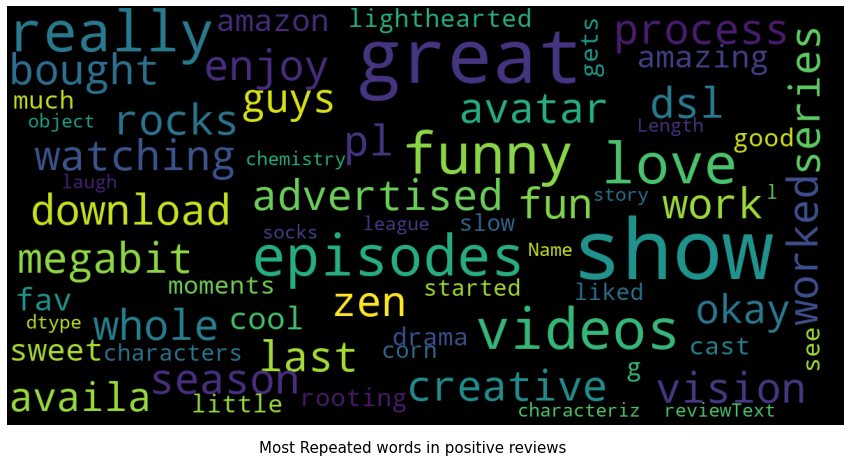

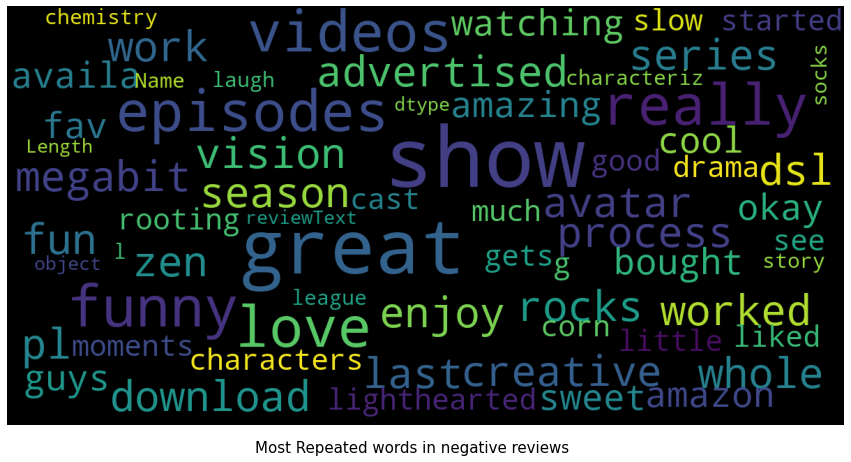

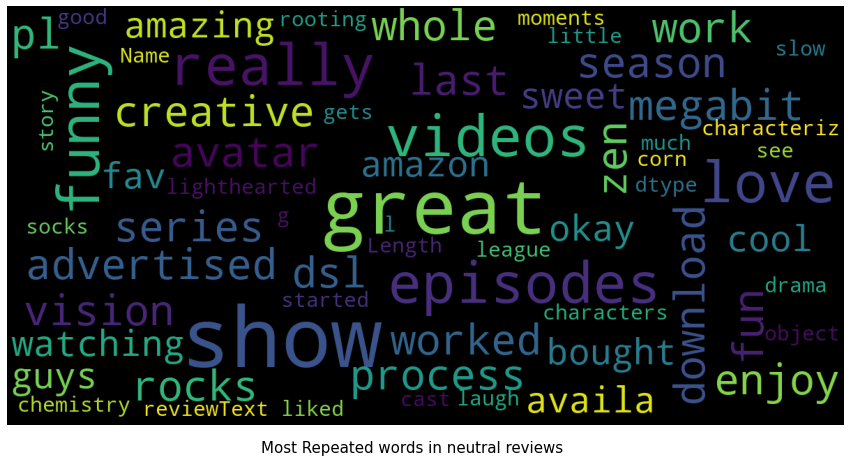

In [ ]:
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")
word_cloud(neu, "Most Repeated words in neutral reviews")

### <div class="alert alert-info">Interpretation
**- From the above plots we can see that most used positive, negative and neutral words from the review text**</div>

In [ ]:
# Getting BIGRAM
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2),stop_words='english').fit(corpus)   # converting a text documents to a matrix of token counts.      
    bag_of_words = vec.transform(corpus)                                         # Transforming the corpus into numbers
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]     # it provides a dictionary with the mapping of the word item index 
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

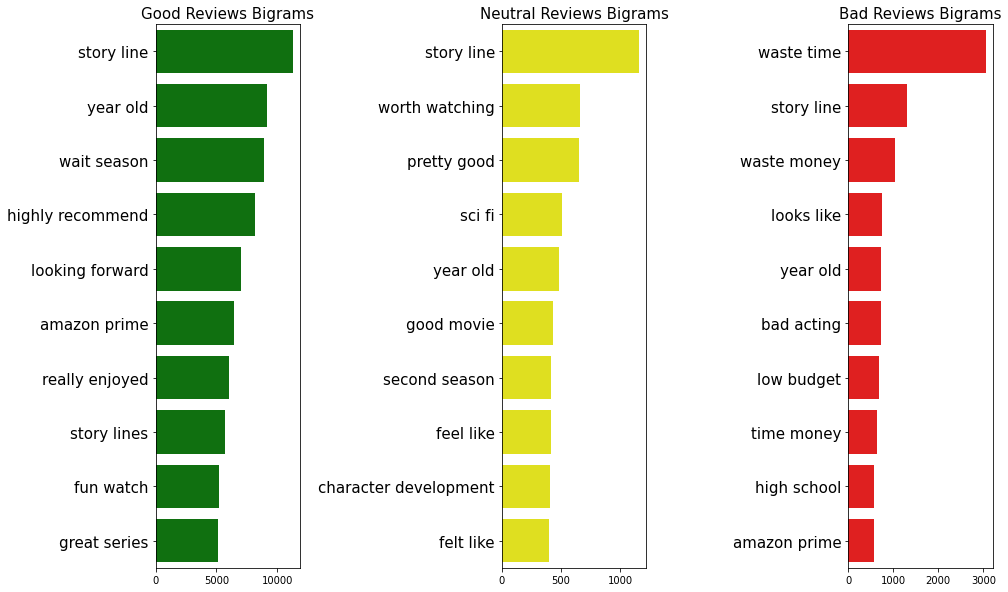

In [ ]:
# create a function for bigram plots
def n_gram_plot(data,title,color):                            # Creating n_gram_plot function
    x=[x[0] for x in data]
    y=[x[1] for x in data]
    sns.barplot(y,x,color='{}'.format(color))
    plt.title('{} Reviews Bigrams'.format(title),fontsize=15)
    plt.yticks(rotation=0,fontsize=15)

common_words_good = get_top_n_bigram(pos, 10)                  # Calling get_top_n_bigram for pos columns
common_words_neutral = get_top_n_bigram(neu, 10)               # Calling get_top_n_bigram for neu columns
common_words_bad = get_top_n_bigram(neg, 10)                   # Calling get_top_n_bigram for neg columns

# bigram plot using function above
plt.figure(figsize=(15,10))
# good reviews bigrams
plt.subplot(151)
n_gram_plot(common_words_good,'Good','green')                  # Calling n_gram_plot for pos 
#============================================= 
#neutral reviews bigrams
plt.subplot(153)
n_gram_plot(common_words_neutral,'Neutral','yellow')           # Calling n_gram_plot for pos
#============================================= 
#bad reviews bigrams
plt.subplot(155)
n_gram_plot(common_words_bad,'Bad','red')                      # Calling n_gram_plot for pos
plt.show()

### <div class="alert alert-info">Interpretation
- **From the above plots we can see that most occuring bigram words in the text reveiws**
- Based on the negative sentiment words the reasons for negative reviews are
- 1. bad acting moveis
- 2. old movies
- 3. low quality movies**</div>

In [ ]:
X = df['reviewText']
Y = df['Pros_cons']

In [ ]:
Y.value_counts()

Pos        423765
Neg         51447
Neutral     35714
Name: Pros_cons, dtype: int64

In [ ]:
Y = LabelEncoder().fit_transform(Y)
Y

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
# Getting unique values and converting it into array
unique, counts = np.unique(Y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0  51447]
 [     1  35714]
 [     2 423765]]


In [ ]:
# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
unique, counts = np.unique(Y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0  36092]
 [     1  24950]
 [     2 296606]]


In [ ]:
# Applying TFIDF Vectorizer
%%time
vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.1, min_df = 1,
                             use_idf = True, smooth_idf = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

CPU times: user 13.8 s, sys: 62.3 ms, total: 13.9 s
Wall time: 15.2 s


## Model selection
Let's consider all the classification algorithm and perform the model selection process

#### &#10148; Logistic regression</br>

In [ ]:
# Making and Fitting the Model
%%time
model = LogisticRegression(multi_class = 'ovr').fit(X_train, Y_train)
y_pred = model.predict(X_test)

CPU times: user 48.7 s, sys: 47.3 s, total: 1min 36s
Wall time: 53.5 s


In [ ]:
# Making unique Values and converting the values in array 
unique, counts = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0  11916]
 [     1   2637]
 [     2 138725]]


In [ ]:
%%time
print(classification_report(Y_test, y_pred, target_names = ['neg', 'neu', 'pos']))

              precision    recall  f1-score   support

         neg       0.74      0.57      0.64     15355
         neu       0.53      0.13      0.21     10764
         pos       0.90      0.98      0.94    127159

    accuracy                           0.88    153278
   macro avg       0.72      0.56      0.60    153278
weighted avg       0.86      0.88      0.86    153278

CPU times: user 178 ms, sys: 4.84 ms, total: 183 ms
Wall time: 179 ms


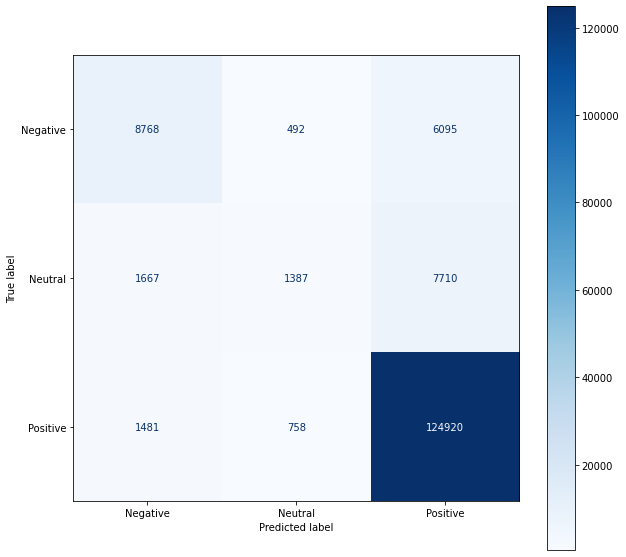

In [ ]:
color = 'white'
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, X_test, Y_test, cmap=plt.cm.Blues, display_labels = ['Negative','Neutral','Positive'], ax = ax)
plt.show()

#### &#10148; Sample Illustration</br>

In [ ]:
a = ['Nice movie to watch', 'worst movie waste of money', 'nice content but bad direction']
a1 = vectorizer.transform(a)

In [ ]:
fo = model.predict(a1)
fo

array([2, 0, 2])

In [ ]:
s = pd.DataFrame({"Random_review":a, "Predictions": ['Positive', 'Negative', 'Positive']})
s

,Random_review,Predictions
0,Nice movie to watch,Positive
1,worst movie waste of money,Negative
2,nice content but bad direction,Positive


#### &#10148; Naive bayes classifier</br>

In [ ]:
# Making and Fitting the model
%%time
model1 = MultinomialNB().fit(X_train, Y_train)
y_pred1 = model1.predict(X_test)

CPU times: user 176 ms, sys: 746 µs, total: 177 ms
Wall time: 193 ms


In [ ]:
print(classification_report(Y_test, y_pred1, target_names = ['neg', 'nue', 'pos']))

              precision    recall  f1-score   support

         neg       0.95      0.06      0.11     15355
         nue       0.00      0.00      0.00     10764
         pos       0.83      1.00      0.91    127159

    accuracy                           0.84    153278
   macro avg       0.60      0.35      0.34    153278
weighted avg       0.79      0.84      0.77    153278



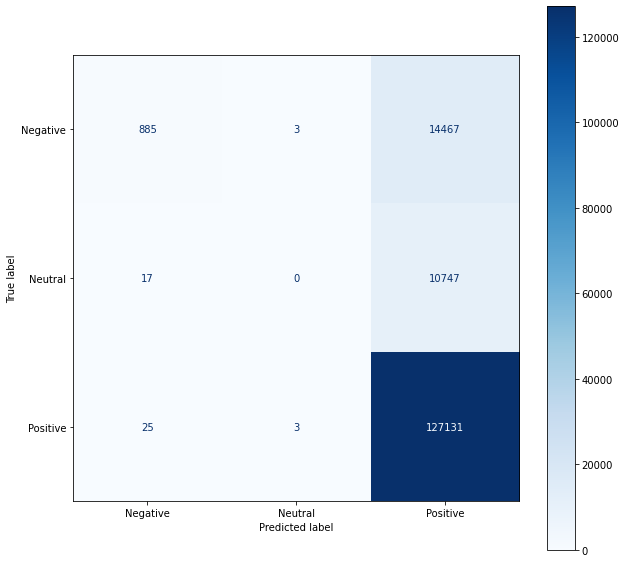

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model1, X_test, Y_test, cmap=plt.cm.Blues, display_labels = ['Negative','Neutral','Positive'], ax = ax)
plt.show()

## &#10148; Time series analysis</br>
- Time series analysis is a technique in statistics that deals with time series data and trend analysis. Time series data follows periodic time intervals that have been measured in regular time intervals or have been collected in particular time intervals.

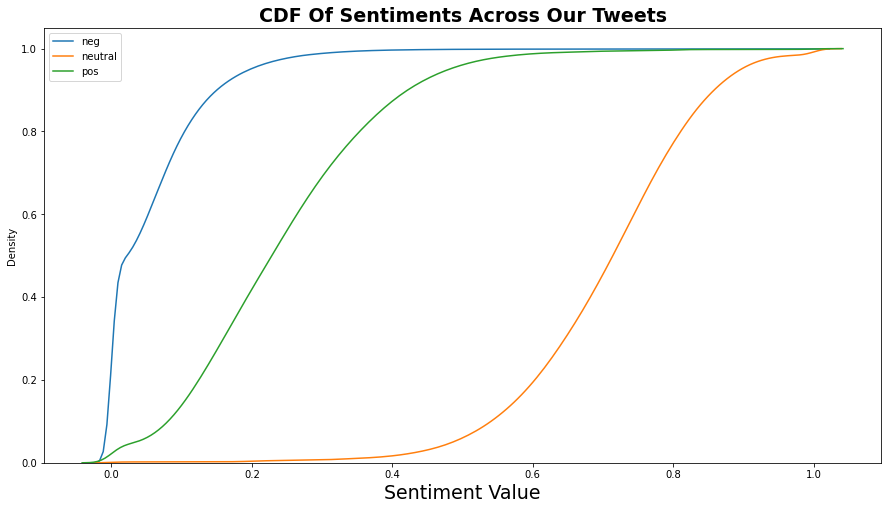

CPU times: user 19.5 s, sys: 503 ms, total: 20 s
Wall time: 19.6 s


In [ ]:
%%time
plt.figure(figsize = (15, 8))
plt.title('CDF Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(df['neg'],bw=0.1,cumulative=True)
sns.kdeplot(df['neu'],bw=0.1,cumulative=True)
sns.kdeplot(df['pos'],bw=0.1,cumulative=True)
plt.xlabel('Sentiment Value',fontsize=19)
plt.legend(['neg', 'neutral', 'pos'])
plt.show()

### <div class="alert alert-info">Interpretation
- **It is also clear that the dominant sentiment is neutral; oddly, most of the reviews do not resemble more positive or negative sentiment rather than neutral.**</div>

In [ ]:
df1 = df[['neg', 'pos', 'reviewTime']]

In [ ]:
# Setting the index as Date
df1 = df1.set_index('reviewTime')
df1.head()

,neg,pos
reviewTime,,
2008-08-04,0.067,0.092
2006-10-22,0.000,0.366
2007-12-30,0.000,0.424
2006-11-10,0.000,0.000
2007-01-24,0.000,0.333


In [ ]:
# Resampling the data based on Weekly 
df1 = df1.resample('W').sum()
df1.shape

(779, 2)

CPU times: user 233 ms, sys: 0 ns, total: 233 ms
Wall time: 294 ms


Text(0.5, 1.0, 'Pos_residual')

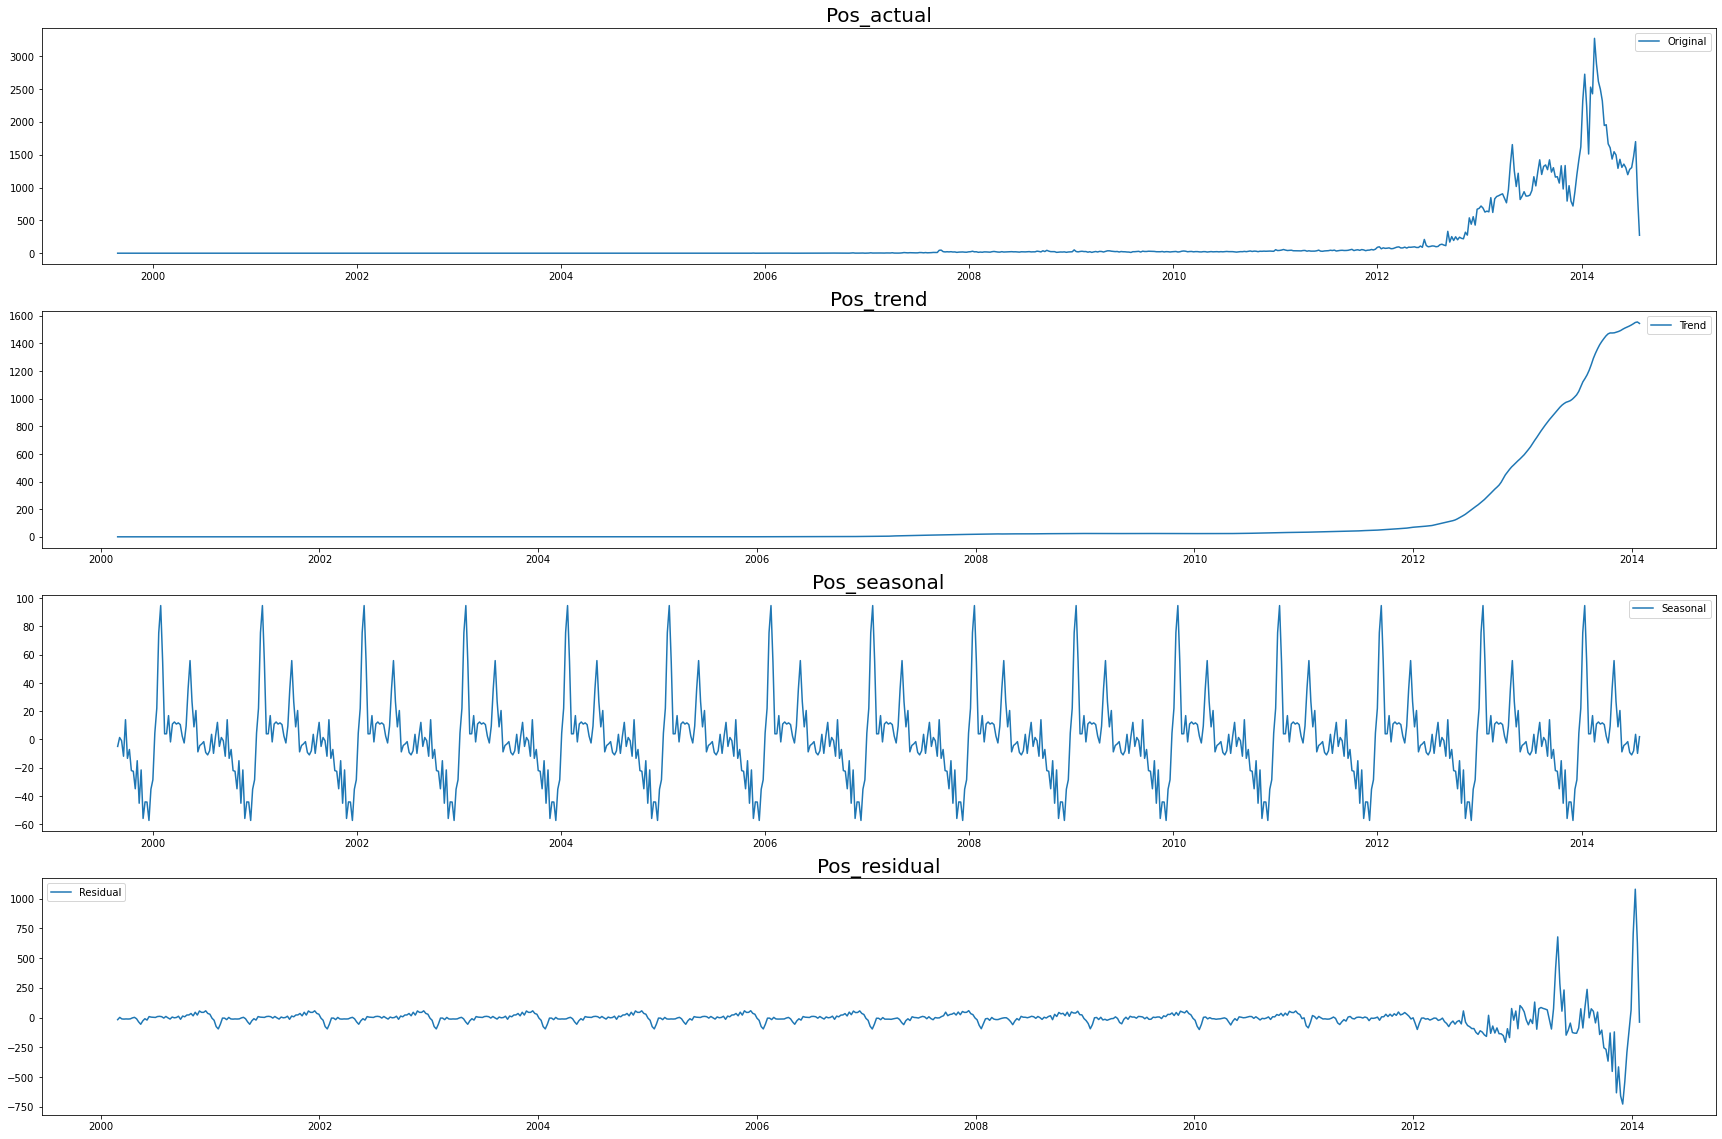

In [ ]:
# Seasonal Decompose For Positive Reviews
%%time
decomposition=seasonal_decompose(df1['pos'], period=52)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid


fig,ax = plt.subplots(4,2,figsize=(30,20))

plt.subplot(411)
plt.plot(df1['pos'],label='Original')
plt.legend(loc='best')
plt.title('Pos_actual', fontsize = 20)

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')
plt.title('Pos_trend', fontsize = 20)

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')
plt.title('Pos_seasonal', fontsize = 20)

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')
plt.title('Pos_residual', fontsize = 20)

### <div class="alert alert-info">Interpretation
- **Above plots shows the time series decomposition and we can see the components of time series for positive reviews**
- **First plot is actual data plot with weekly dispersed data points**
- **Second one shows the trend in the data where we can see there is positive trend in the dataset**
- **Third plot shows the seasonality which we can see some repetitions over the period of time**
- **Last plot shows the irregularity in the the data over a period of time we can see some irregular kind over a period in the plot**

CPU times: user 133 ms, sys: 770 µs, total: 134 ms
Wall time: 135 ms


Text(0.5, 1.0, 'neg_residual')

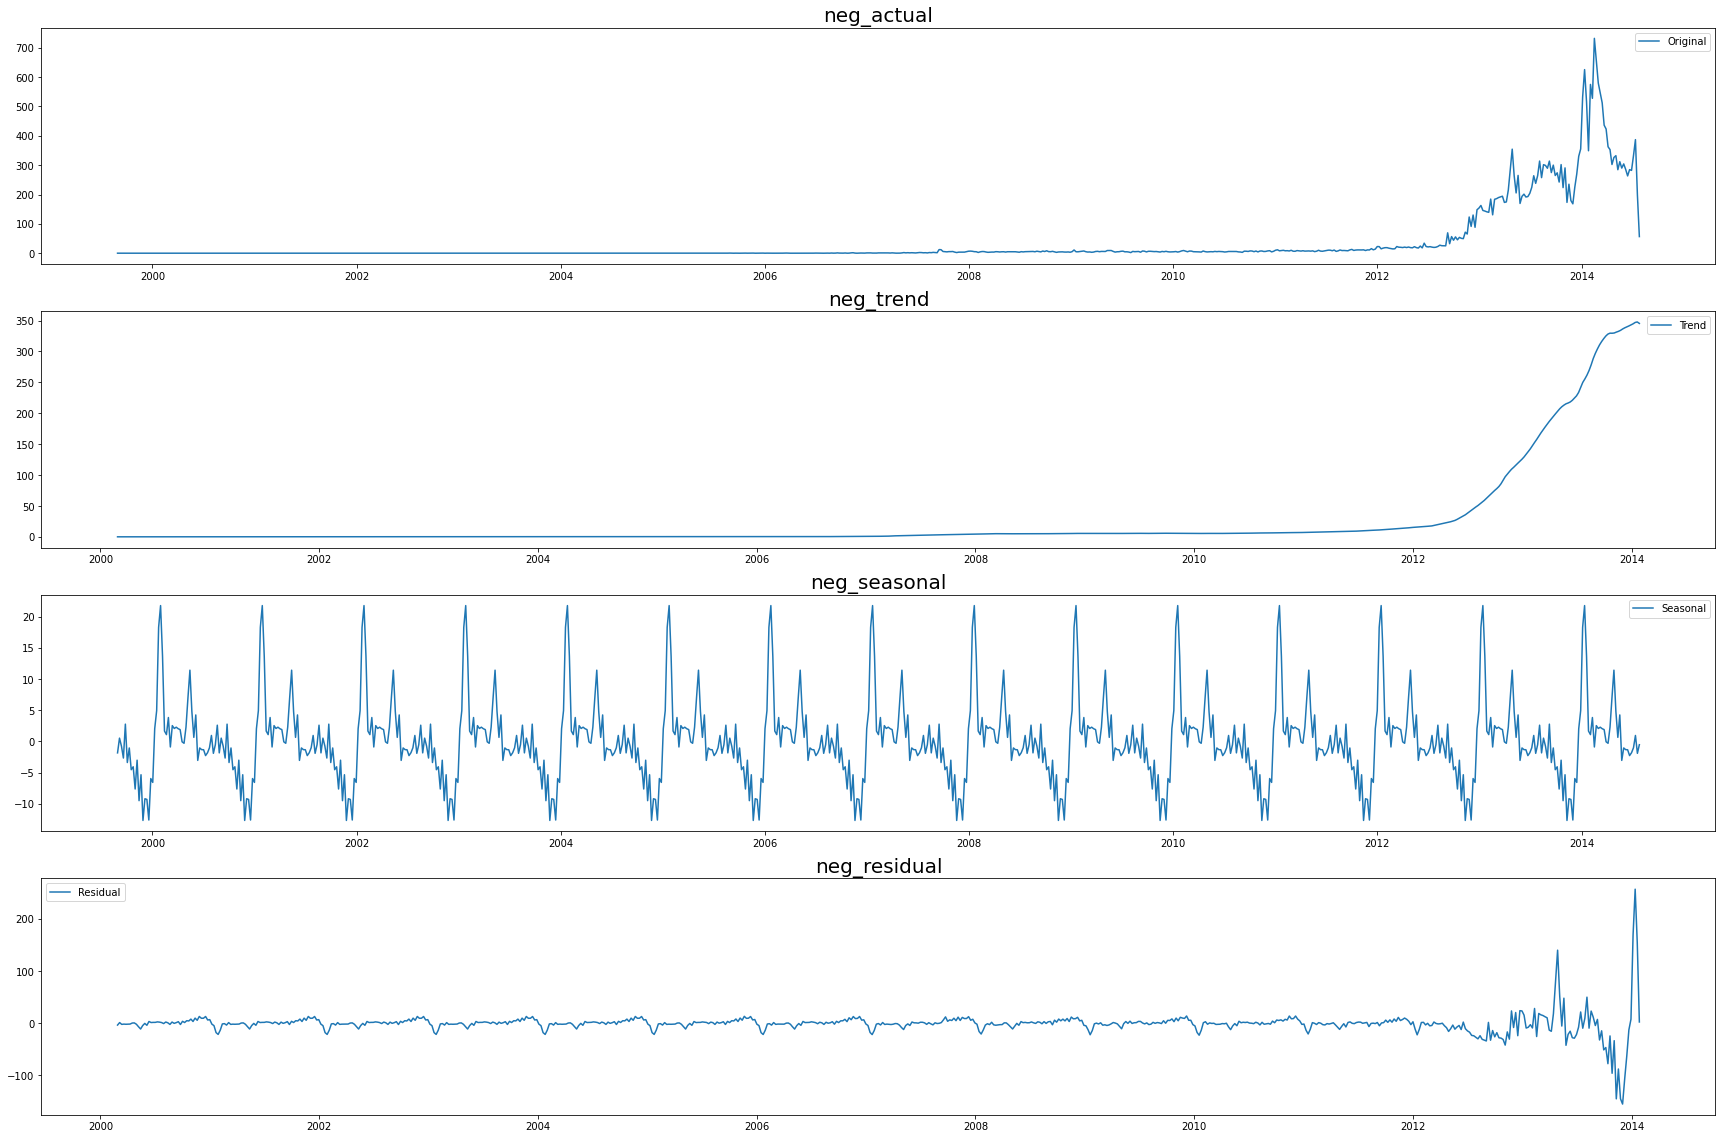

In [ ]:
# Seasonal Decompose For Negative Reviews
%%time
decomposition=seasonal_decompose(df1['neg'], period=52)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid


fig,ax = plt.subplots(4,2,figsize=(30,20))

plt.subplot(411)
plt.plot(df1['neg'],label='Original')
plt.legend(loc='best')
plt.title('neg_actual', fontsize = 20)

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')
plt.title('neg_trend', fontsize = 20)

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')
plt.title('neg_seasonal', fontsize = 20)

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')
plt.title('neg_residual', fontsize = 20)

### <div class="alert alert-info">Interpretation
- **Above plots shows the time series decomposition and we can see the components of time series for negative reviews**
- **First plot is actual data plot with weekly dispersed data points**
- **Second one shows the trend in the data where we can see there is positive trend in the dataset**
- **Third plot shows the seasonality which we can see some repetitions over the period of time**
- **Last plot shows the irregularity in the the data over a period of time we can see some irregular kind over a period in the plot**

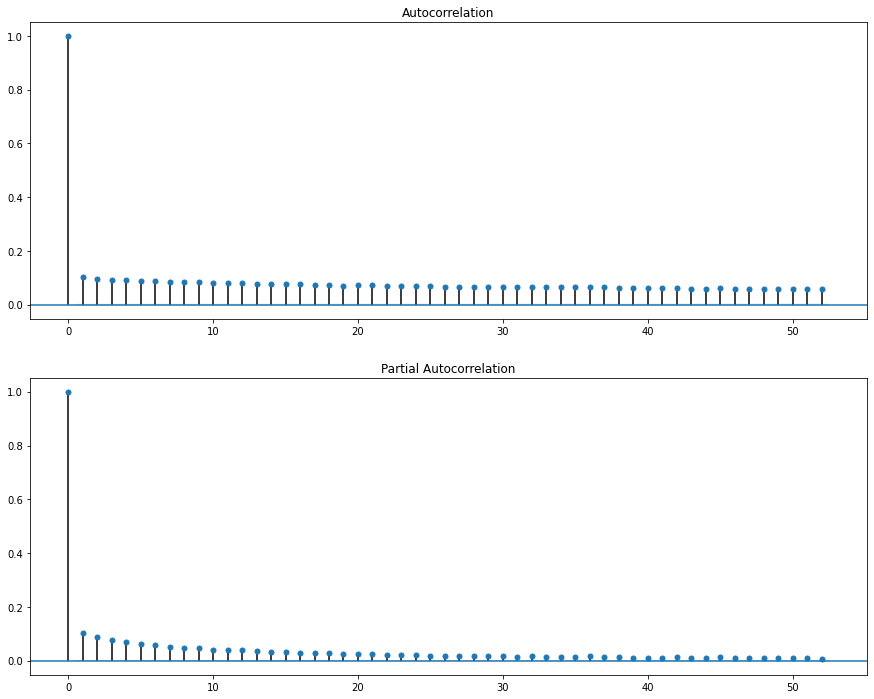

In [ ]:
plt.figure(figsize=(15,12))
plt.subplot(211)
plot_acf(df['pos'], ax=plt.gca(), lags = 52)
plt.subplot(212)
plot_pacf(df['pos'], ax=plt.gca(), lags = 52)
plt.show()

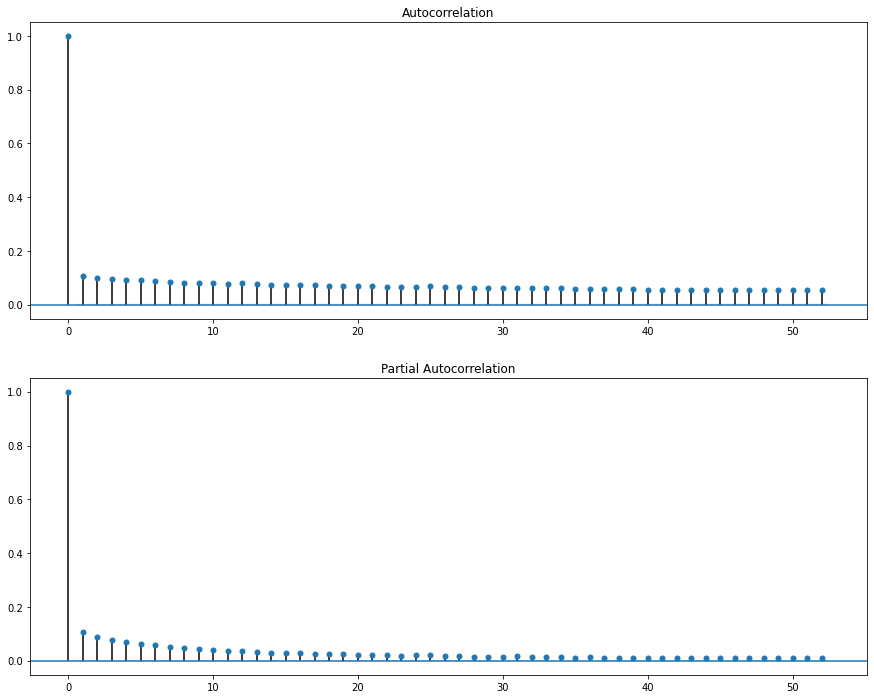

In [ ]:
plt.figure(figsize=(15,12))
plt.subplot(211)
plot_acf(df['neg'], ax=plt.gca(), lags = 52)
plt.subplot(212)
plot_pacf(df['neg'], ax=plt.gca(), lags = 52)
plt.show()

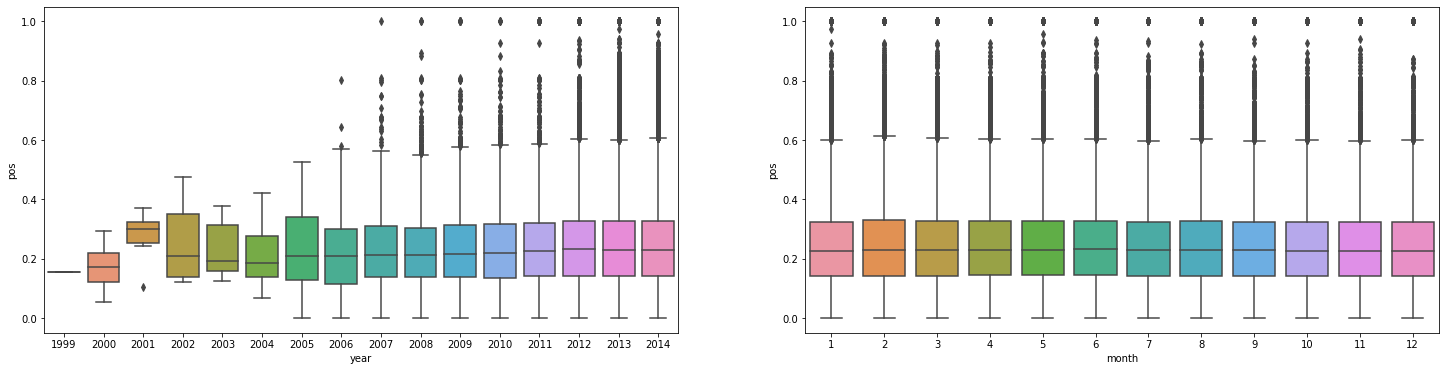

In [ ]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.boxplot(df.year, df.pos)

plt.subplot(1, 2, 2)
sns.boxplot(df.month, df.pos)
plt.show()

### <div class="alert alert-info">Interpretation
**- From the visualisation we can see how the sentiments distributed over the years as well as months, the mean and the variation is almost same over the period**</div>

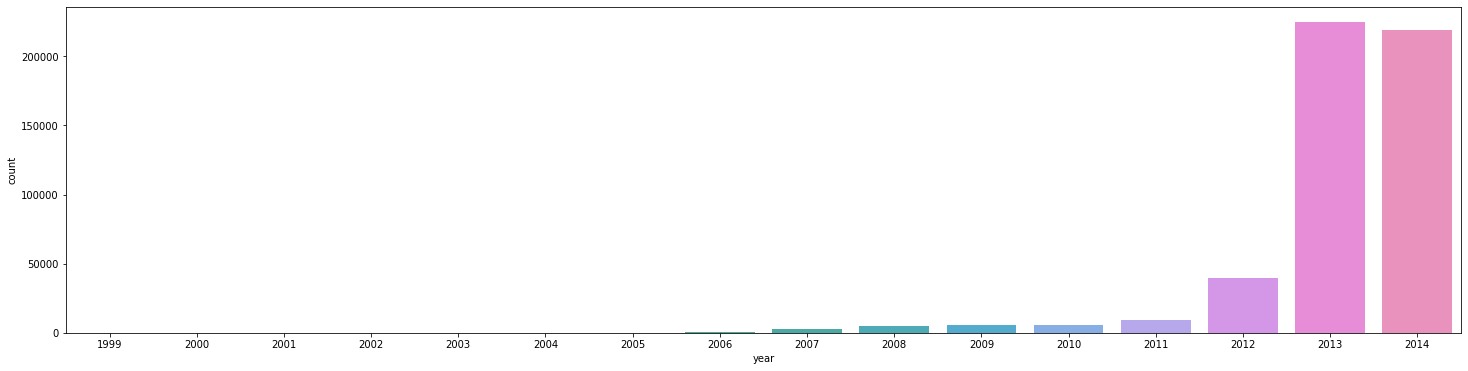

In [ ]:
plt.figure(figsize=(25, 6))
sns.countplot(df.year)

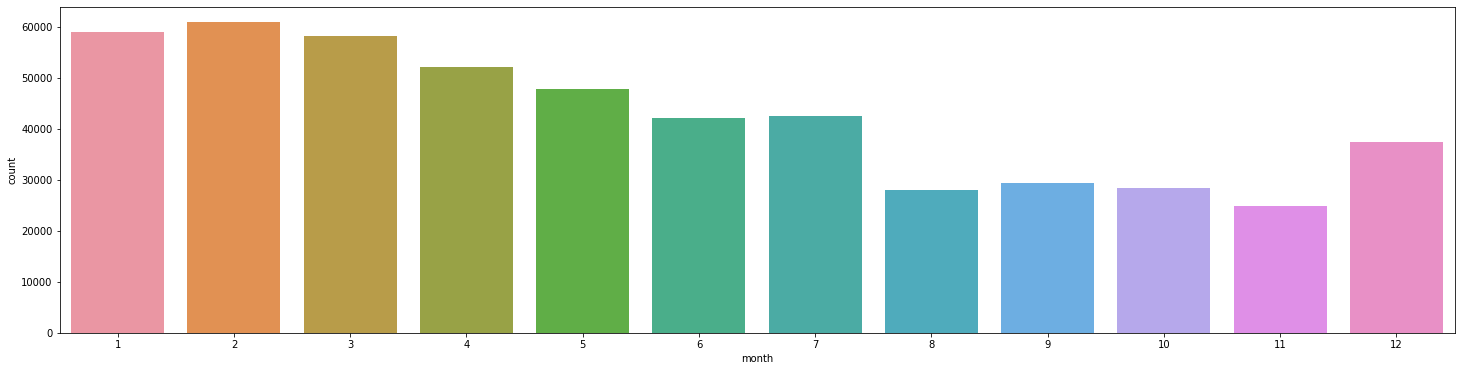

In [ ]:
plt.figure(figsize=(25, 6))
sns.countplot(df.month)

In [ ]:
# Creating function to check stationarity
def checkstationary(df):
    pvalue = adfuller(df)[1]
    if pvalue < 0.05:
        ret = 'Pvalue:{}. Data is stationary, Proceed to model building'.format(pvalue)
    else:
        ret = 'Pvalue:{}.Data is not stationary, make data stationary'.format(pvalue)
    return ret

In [ ]:
# Checking Stationarity of Negative Sentiment Column
checkstationary(df1['neg'])

'Pvalue:9.179615470132326e-05. Data is stationary, Proceed to model building'

### <div class="alert alert-info">Interpretation
**- From augmented dickey fuller test we can see that the data is stationary so we can use this data to building the model**</div>

In [ ]:
# Checking Stationarity of Positive Sentiment Column
checkstationary(df1['pos'])

'Pvalue:0.000408564586692156. Data is stationary, Proceed to model building'

### <div class="alert alert-info">Interpretation
**- From augmented dickey fuller test we can see that the data is stationary so we can use this data to building the model**</div>

In [ ]:
# Splitting the data
split = int(0.95 * len(df1))
train = df1.iloc[:split]
test = df1.iloc[split:]
print("Train = {}, Test = {}".format(len(train), len(test)))

Train = 740, Test = 39


In [ ]:
# Creating function to get optimum p and q value
def sarima_model(p,d,q,P,D,Q):
    sm1=SARIMAX(train,order=(p,d,q),seasonal_order=(P,D,Q,52)).fit()
    f1=sm1.forecast(len(test))
    actual=[]
    predicted=[]
    for i in range(len(f1)):
        actual.append(test[i])
        predicted.append(f1[i])
    RMSE=round(mean_squared_error(actual,predicted,squared=False),3)
    return RMSE,actual,predicted

In [ ]:
p=[0,1, 2]
d=1
q=[0,1, 2]
p1=[]
q1=[]
rmse1=[]
P=[0,1, 2]
Q=[0,1, 2]
D=1
P1=[]
Q1=[]
for i in range(len(p)):
    for j in range(len(q)):
        for k in range(len(P)):
            for l in range(len(Q)):
                p1.append(p[i])
                q1.append(q[j])
                P1.append(P[k])
                Q1.append(Q[l])
                rmse1.append(sarima_model(p[i],d,q[j],P[k],D,Q[l])[0])

In [ ]:
val2 = pd.DataFrame(zip(p1,q1,P1,Q1,rmse1),columns=['p','q','P','Q','RMSE'])
val2.sort_values(by='RMSE').head(1)

In [ ]:
# Creating function for sarima model for negative sentiment
def SARMA1(df):
    model2 = SARIMAX(train['neg'],order=(1, 0, 2),seasonal_order=(1,0,2,52)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['neg'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

In [ ]:
# Creating function for sarima model for positive sentiment
def SARMA2(df):
    model2 = SARIMAX(train['pos'],order=(1, 1, 2),seasonal_order=(1,1,2,52)).fit()
    print('Summary : S')
    print('past_predictions : past')
    print('future_predictions : future')
    select = input('Enter you requried information: ')
    summary  = model2.summary()
    pred1 = model2.predict()
    forecast1 = model2.forecast(len(test['pos'])+20)
    if select == 'S':
        return summary
    elif select == 'past':
        return pred1
    else:
        return forecast1

In [ ]:
train1 = SARMA1(train['neg'])

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


In [ ]:
train2 = SARMA2(train['pos'])

Summary : S
past_predictions : past
future_predictions : future
Enter you requried information: df


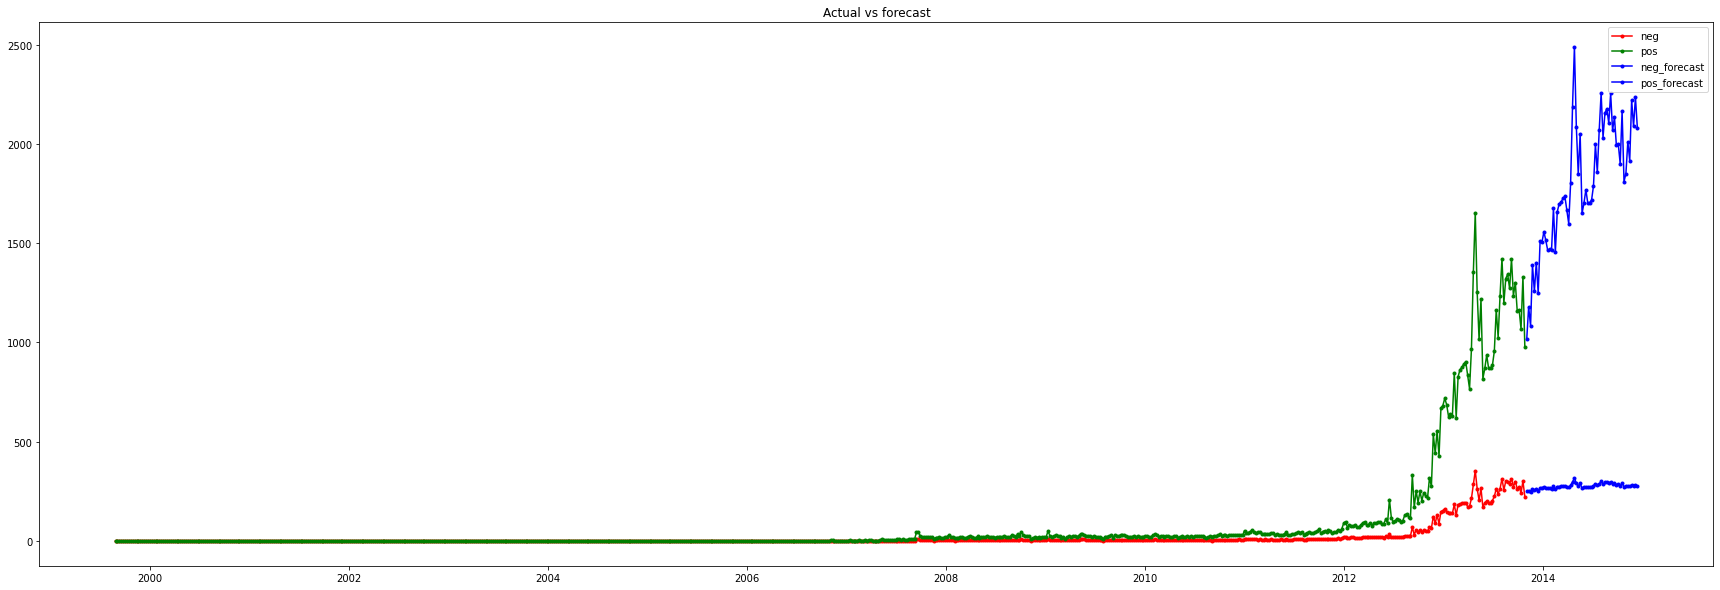

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Actual vs forecast')
plt.plot(train['neg'],marker = '.', label = 'neg', color = 'red')
plt.plot(train['pos'],marker = '.', label = 'pos', color = 'g')
plt.plot(train1,marker = '.', label = 'neg_forecast', color = 'b')
plt.plot(train2,marker = '.', label = 'pos_forecast', color = 'b')
plt.legend()

In [ ]:
# Evaluation using RMSE
pos_rmse = np.sqrt(mean_squared_error(test['pos'], train2[:-20]))
neg_rmse = np.sqrt(mean_squared_error(test['pos'], train1[:-20]))

In [ ]:
res = pd.DataFrame({'Sentiments':['Pos', 'neg'], 'RMSE':[pos_rmse, neg_rmse]})
res

,Sentiments,RMSE
0,Pos,719.773906
1,neg,1509.625579


### <div class="alert alert-info">Interpretation
**- From both visualization as well as the error values of forcast data we can see the SARIMA model is giving good forcast results and the positive and negative reviews are increasing over period but the positive reviews are inresing in more percent compare to negative review**</div>

## &#10148; Clustering</br>
- Cluster analysis is the grouping of objects such that objects in the same cluster are more similar to each other than they are to objects in another cluster. The classification into clusters is done using criteria such as smallest distances, density of data points, graphs, or various statistical distributions.

In [ ]:
df.head()

,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,userID,categories,price,Pros_cons,neg,neu,pos,compound,year,month
0,pos,B000HCWZFY,avatar rocks the whole series is great and the...,Avatar Rocks,5.0,1.217808e+09,2008-08-04,A19013B9RM977H,[['Amazon Instant Video']],31.96,Pos,0.067,0.840,0.092,0.4461,2008,8
1,pos,B000HCWZFY,the download process worked as advertised i ha...,"Caffeinator ""Caffeinator""",4.0,1.161475e+09,2006-10-22,A2WY2OIFHQPNKJ,[['Amazon Instant Video']],31.96,Pos,0.000,0.634,0.366,0.8860,2006,10
2,pos,B000HCWZFY,these videos are great they work great with ou...,"D ""neverland mom""",5.0,1.198973e+09,2007-12-30,A1D2KQRGFZJAOQ,[['Amazon Instant Video']],31.96,Pos,0.000,0.576,0.424,0.8957,2007,12
3,neutral,B000HCWZFY,this is a very fun show and i enjoy watching i...,Jerilynn Lau,5.0,1.163117e+09,2006-11-10,A25CAGG4BOANG0,[['Amazon Instant Video']],31.96,Pos,0.000,1.000,0.000,0.0000,2006,11
4,pos,B000HCWZFY,okay you guys have amazing cool and sweet vide...,S. Damodaran,5.0,1.169597e+09,2007-01-24,A2NP6501BPYGXI,[['Amazon Instant Video']],31.96,Pos,0.000,0.667,0.333,0.8746,2007,1


In [ ]:
X1 = df[['price', 'unixReviewTime']]

In [ ]:
# Scaling the data
%%time
Scaler = StandardScaler()
for i in X1.columns:
    X1[i] = Scaler.fit_transform(np.array(X1[i]).reshape(-1, 1))

CPU times: user 17 ms, sys: 1.83 ms, total: 18.8 ms
Wall time: 20.5 ms


CPU times: user 1min 24s, sys: 11.5 s, total: 1min 36s
Wall time: 1min 5s


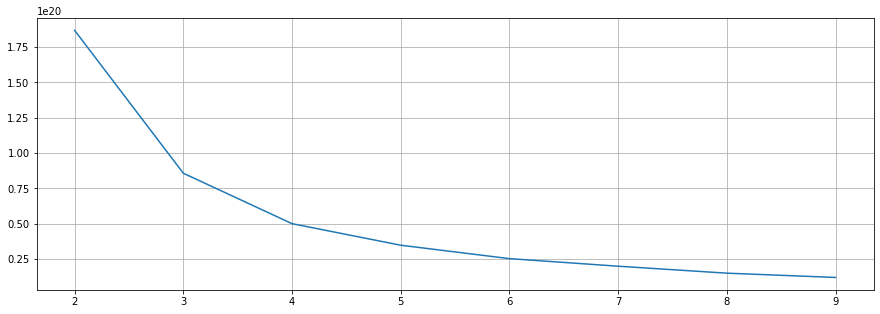

In [ ]:
%%time
X1 = X1.values
distortion = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i).fit(X1)
    distortion.append(kmeans.inertia_)
plt.figure(figsize = (15, 5))
plt.plot(range(2, 10), distortion)
plt.grid(True)

In [ ]:
# Making the model and fitting it
%%time
model1 = KMeans(n_clusters = 5, random_state = 10).fit(X1)
pred = model1.fit_predict(X1)

CPU times: user 19.4 s, sys: 2.72 s, total: 22.2 s
Wall time: 11.5 s


In [ ]:
df.columns

Index(['Class', 'asin', 'reviewText', 'reviewerName', 'overall',
       'unixReviewTime', 'reviewTime', 'userID', 'categories', 'price',
       'Pros_cons', 'neg', 'neu', 'pos', 'compound', 'year', 'month'],
      dtype='object')

Text(0, 0.5, 'Unixreviewtime')

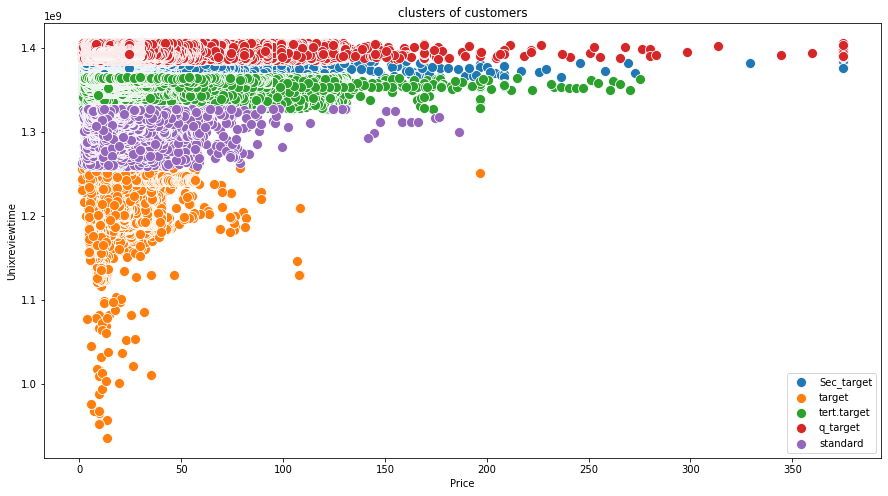

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=X1[pred==0,0] ,y=X1[pred==0,1] ,s=100,label="Sec_target")
sns.scatterplot(x=X1[pred==1,0] ,y=X1[pred==1,1],s=100,label="target")
sns.scatterplot(x=X1[pred==2,0] ,y=X1[pred==2,1] ,s=100,label="tert.target")
sns.scatterplot(x=X1[pred==3,0] ,y=X1[pred==3,1],s=100,label="q_target")
sns.scatterplot(x=X1[pred==4,0] ,y=X1[pred==4,1],s=100,label="standard")
#sns.scatterplot(x=kmeans.cluster_centers_[:,0] ,y= kmeans.cluster_centers_[:,1] ,s=300,label="center")
plt.title("clusters of customers")
plt.xlabel("Price")
plt.ylabel("Unixreviewtime")


### <div class="alert alert-info">Interpretation
- **1. This graph illustrates the relation between the review time and the price of the product where each cluster shows the grouping of reviews on the particular products**

- **2. The purple cluster shows the target cluster which can be said as excellent and the worst reviews that is 5 and 1 rated reviews. As the price of product is increasing the review time is also increasing, from this we can interpret that either the product is very good or worst as people tends to give instant reviews when the product is strongly liked or disliked by them**

- **3. The more the review time is increasing we can see the product price is also increasing from which we can interpret that customer take some time to give reviews when the product have higher price**</div>

In [ ]:
clus = df.copy()

In [ ]:
# Assigning the clusters 
clusters=[]
for c in pred:
    if c==0:
        clusters.append("Sec_target")
    elif c==1:
        clusters.append("target")
    elif c==2:
        clusters.append("not_considered")
    elif c==3:
        clusters.append("q_target")
    elif c==4:
        clusters.append("standard") 
        
        
clus["clusters1"]=clusters


In [ ]:
d1=clus[(clus["clusters1"]=='target')]
d1["overall"].value_counts()

5.0    8498
4.0    1947
1.0     931
3.0     876
2.0     534
Name: overall, dtype: int64

In [ ]:
d2=clus[(clus["clusters1"]=='standard')]
d2["overall"].value_counts()

5.0    9848
4.0    2619
1.0    1826
3.0    1353
2.0     902
Name: overall, dtype: int64

In [ ]:
d3=clus[(clus["clusters1"]=='not_considered')]
d3["overall"].value_counts()

5.0    51876
4.0    12444
1.0     6175
3.0     5853
2.0     3650
Name: overall, dtype: int64

In [ ]:
d4=clus[(clus["clusters1"]=='Sec_target')]
d4["overall"].value_counts()

5.0    102461
4.0     26444
3.0     11080
1.0      8498
2.0      6013
Name: overall, dtype: int64

In [ ]:
d5=clus[(clus["clusters1"]=='q_target')]
d5["overall"].value_counts()

5.0    164838
4.0     42790
3.0     16552
1.0     13960
2.0      8958
Name: overall, dtype: int64

In [ ]:
improve=clus[(clus["clusters1"]=='target') & (clus["overall"]<3)]

In [ ]:
a=clus[(clus["clusters1"]=='target')]

In [ ]:
# Recommending the products
improve['asin'].value_counts()[0:10]

B0044BY98K    75
B004GEYL9M    54
B004EW7AWG    39
B002962RKE    37
B004I90IW4    34
B003075T38    33
B0064JGWZS    28
B002QS5OQ4    25
B003UPE4WC    23
B003XU02QG    23
Name: asin, dtype: int64

In [ ]:
improve1=clus[(clus["clusters1"]=='target') & (clus["overall"]==1)]
improve1['asin'].value_counts()[0:10]

B004GEYL9M    53
B0044BY98K    52
B004EW7AWG    33
B0064JGWZS    28
B002962RKE    28
B003075T38    25
B004I90IW4    19
B003CWHG8M    19
B002QS5OQ4    18
B002IVNLKA    15
Name: asin, dtype: int64

In [ ]:
improve2=clus[(clus["clusters1"]=='target') & (clus["overall"]==5)]
improve2['asin'].value_counts()[0:10]

B002962RKE    231
B001F6ZIXC    145
B0012QRPU4    141
B000VZUWZW    137
B002L4BQ42    124
B002KGEORM    122
B002TUO2SU    114
B000JO9JHW    105
B004X2M3N8    105
B00337ZGIS     88
Name: asin, dtype: int64

## &#10148; Customer segmentation</br>
- We can’t treat every customer the same way with the same content, same channel, same importance. They will find another option which understands them better.
- Customers who use your platform have different needs and they have their own different profile. Your should adapt your actions depending on that.
- You can do many different segmentations according to what you are trying to achieve. If you want to increase retention rate, you can do a segmentation based on the similarities between the customers
- But there are very common and useful segmentation methods as well. Now we are going to implement one of them to our business: RFM.
- **1. Recency: How recently customers made their purchase.**
- **2. Frequency: For simplicity, we’ll count the number of times each customer made a purchase.**
- **3. Monetary: How much money they spent in total.**

In [ ]:
df.columns

Index(['Class', 'asin', 'reviewText', 'reviewerName', 'overall',
       'unixReviewTime', 'reviewTime', 'userID', 'categories', 'price',
       'Pros_cons', 'neg', 'neu', 'pos', 'compound', 'year', 'month'],
      dtype='object')

In [ ]:
CS_df = pd.DataFrame(df['userID'].unique())
CS_df.columns = ['userID']

In [ ]:
Max_purchase = df.groupby('userID').reviewTime.max().reset_index()
Max_purchase.columns = ['userID','MaxPurchaseDate']

#### &#10148; Recency</br>

In [ ]:
Max_purchase['Recency'] = (Max_purchase['MaxPurchaseDate'].max() - Max_purchase['MaxPurchaseDate']).dt.days

In [ ]:
CS_df = pd.merge(CS_df, Max_purchase[['userID','Recency']], on='userID')
CS_df.head()

,userID,Recency
0,A19013B9RM977H,2179
1,A2WY2OIFHQPNKJ,2831
2,A1D2KQRGFZJAOQ,2397
3,A25CAGG4BOANG0,2812
4,A2NP6501BPYGXI,2737


#### &#10148; Frequency</br>

In [ ]:
tx_frequency = df.groupby('userID').reviewTime.count().reset_index()
tx_frequency.columns = ['userID','Frequency']

In [ ]:
CS_df = pd.merge(CS_df, tx_frequency, on='userID')

#### &#10148; Revenue</br>

In [ ]:
tx_revenue = df.groupby('userID').price.sum().reset_index()

In [ ]:
CS_df = pd.merge(CS_df, tx_revenue, on='userID')

In [ ]:
CS_df.head()

,userID,Recency,Frequency,price
0,A19013B9RM977H,2179,1,31.96
1,A2WY2OIFHQPNKJ,2831,1,31.96
2,A1D2KQRGFZJAOQ,2397,1,31.96
3,A25CAGG4BOANG0,2812,1,31.96
4,A2NP6501BPYGXI,2737,1,31.96


In [ ]:
CS_df.isnull().sum()

userID       0
Recency      0
Frequency    0
price        0
dtype: int64

#### &#10148; K_means</br>

In [ ]:
a = CS_df.select_dtypes(exclude = 'object')
b = CS_df.select_dtypes(include = 'object')

In [ ]:
a.columns

Index(['Recency', 'Frequency', 'price'], dtype='object')

In [ ]:
CS_df

,userID,Recency,Frequency,price
0,A19013B9RM977H,2179,1,31.960000
1,A2WY2OIFHQPNKJ,2831,1,31.960000
2,A1D2KQRGFZJAOQ,2397,1,31.960000
3,A25CAGG4BOANG0,2812,1,31.960000
4,A2NP6501BPYGXI,2737,1,31.960000
...,...,...,...,...
379421,A1YBJWXMLX868G,149,1,24.092868
379422,A266MJ3LCYSG3J,133,1,24.091999
379423,A3EHAXIFVJFXR6,139,1,24.089389
379424,A23110JGJ6FCKX,156,1,24.088519


In [ ]:
CS_df1 = CS_df.copy()

In [ ]:
CS_df1.head()

,userID,Recency,Frequency,price
0,A19013B9RM977H,2179,1,31.96
1,A2WY2OIFHQPNKJ,2831,1,31.96
2,A1D2KQRGFZJAOQ,2397,1,31.96
3,A25CAGG4BOANG0,2812,1,31.96
4,A2NP6501BPYGXI,2737,1,31.96


In [ ]:
# Scaling the data
%time
Scaler = StandardScaler()
for i in a.columns:
    CS_df1[i] = Scaler.fit_transform(np.array(CS_df[i]).reshape(-1, 1))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


In [ ]:
# Getting optimum cluster number
%%time
X = CS_df1.drop(['userID'], axis = 1).values
distortion = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i).fit(X)
    distortion.append(kmeans.inertia_)

CPU times: user 1min 22s, sys: 11.8 s, total: 1min 34s
Wall time: 56.3 s


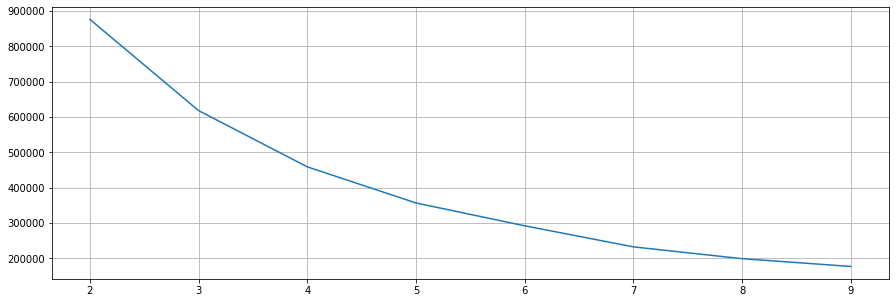

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(range(2, 10), distortion)
plt.grid(True)

### <div class="alert alert-info">Interpretation
**- From the above elbow curve we can take k as 3 because the slope is more at k = 3**</div>

In [ ]:
# Creating Model and fitting it
%%time
model = KMeans(n_clusters = 3, random_state = 10).fit(X)
pred = model.fit_predict(X)

CPU times: user 15.1 s, sys: 2.15 s, total: 17.3 s
Wall time: 9.04 s


In [ ]:
CS_df.columns

Index(['userID', 'Recency', 'Frequency', 'price'], dtype='object')

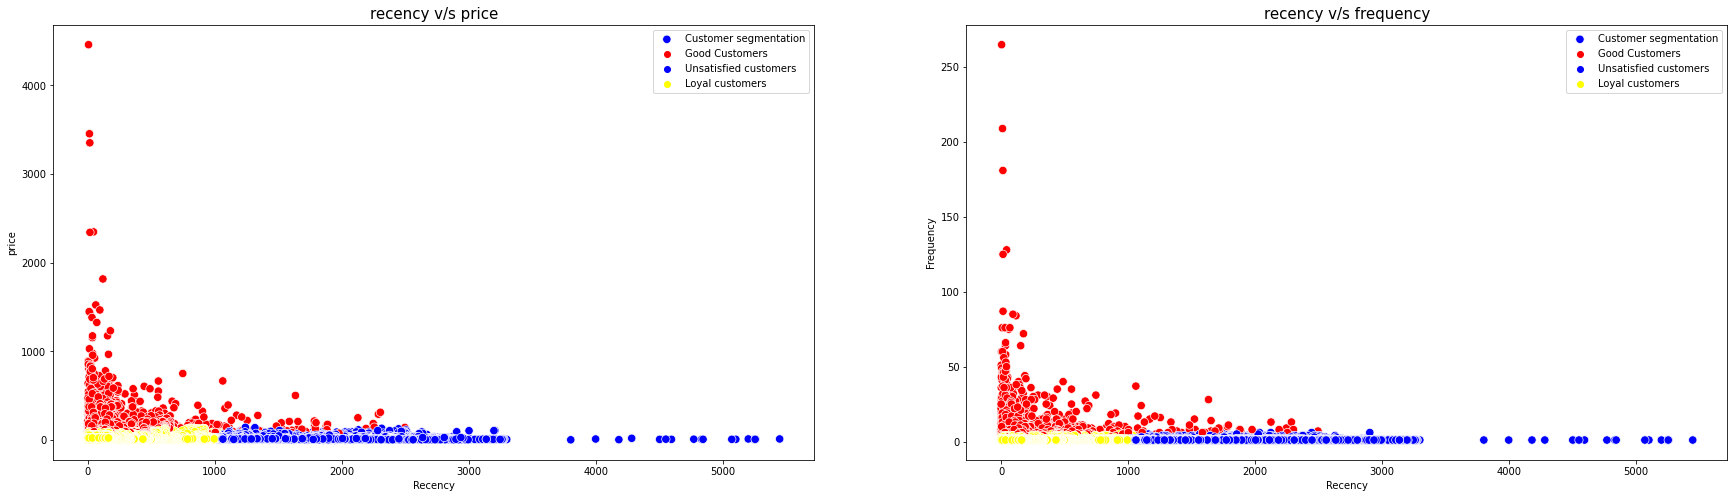

In [ ]:
color1 = [ "red", "blue", "Yellow"]
l = ["Customer segmentation", 'Good Customers', 'Unsatisfied customers', 'Loyal customers']
plt.figure(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = CS_df['Recency'], y = CS_df['price'], s = 70, hue =pred, palette = color1)
plt.legend(labels = l)
plt.title('recency v/s price', fontsize = 15)

plt.subplot(1, 2, 2)
sns.scatterplot(x = CS_df['Recency'], y = CS_df['Frequency'], s = 70, hue =pred, palette = color1)
plt.legend(labels = l)
plt.title('recency v/s frequency', fontsize = 15)
plt.show()

### <div class="alert alert-info">Interpretation
**- From the above clustering result we can see cleary 3 types of clusters are there**
- 1. Good customers: They are visiting the sites more frequently and revenue is good
- 2. Unsatisfied customers: They are stop visiting the site for a long time so we can assume that they are not satisfied with the service
- 3. Loyal customers: they are frequently visiting customers aswell as they are generating high revenue than that good customers </div>

## &#10148; Amazon recommendation system</br>
### What Recommendation Systems Can Solve?
- It helps the consumer to find the best product.
- It helps websites to increase user engagement.
- It makes the contents more personalized.
- It helps websites to find the most relevant product for the consumer.
- Help item providers in delivering their items to the right user.

In [ ]:
df.columns

Index(['Class', 'asin', 'reviewText', 'reviewerName', 'overall',
       'unixReviewTime', 'reviewTime', 'userID', 'categories', 'price',
       'Pros_cons', 'neg', 'neu', 'pos', 'compound', 'year', 'month'],
      dtype='object')

In [ ]:
df3 = df[['userID', 'asin', 'overall']]

In [ ]:
df3.rename(columns = {'asin':'productId', 'overall': 'ratings'}, inplace = True)

In [ ]:
df3.head()

,userID,productId,ratings
0,A19013B9RM977H,B000HCWZFY,5.0
1,A2WY2OIFHQPNKJ,B000HCWZFY,4.0
2,A1D2KQRGFZJAOQ,B000HCWZFY,5.0
3,A25CAGG4BOANG0,B000HCWZFY,5.0
4,A2NP6501BPYGXI,B000HCWZFY,5.0


In [ ]:
df3.describe()

,ratings
count,510926.000000
mean,4.327881
std,1.154541
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
df4=df3.iloc[:1000005,0:]

In [ ]:
df4.isnull().sum()

userID       0
productId    0
ratings      0
dtype: int64

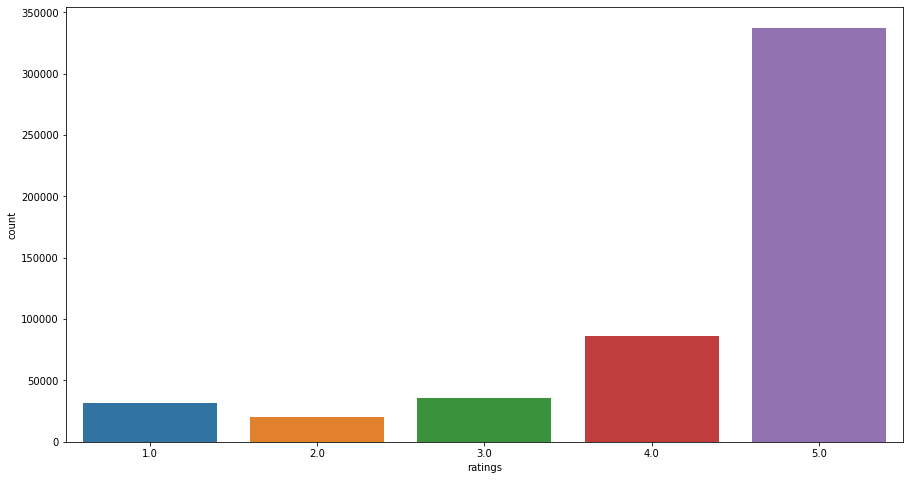

In [ ]:
plt.figure(figsize = (15, 8))
sns.countplot(df4['ratings'])
plt.show()

In [ ]:
print("\nTotal no of ratings :",df4.shape[0])
print("Total No of Users   :", len(np.unique(df4.userID)))
print("Total No of products  :", len(np.unique(df4.productId)))


Total no of ratings : 510926
Total No of Users   : 379426
Total No of products  : 21982


In [ ]:
top_rating = df4.groupby(by='userID')['ratings'].count().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',top_rating)

Top 10 users based on ratings: 
 userID
A27H9DOUGY9FOS    265
A3EDIPCXT15C3T    209
AV6QDP8Q0ONK4     181
AW3VZ5O895LRK     128
AIMR915K4YCN      125
A2HVL790PBWYTU     87
A1XT8AJB7S9JJG     85
A3MWYPZBKL1NJ      84
A1POFVVXUZR3IQ     76
A1I1U2M5KSPY1R     76
Name: ratings, dtype: int64


In [ ]:
new_df=df4.groupby("productId").filter(lambda x:x['ratings'].count() >=50)
new_df

,userID,productId,ratings
24,A146ARSMWDDIX7,B000HKWE3O,5.0
25,A18YW67OETUT1U,B000HKWE3O,5.0
26,AJ83HWPMW5B99,B000HKWE3O,5.0
27,A1YYYREJ78MDAN,B000HKWE3O,4.0
28,A32B7Q1GMGW1SE,B000HKWE3O,5.0
...,...,...,...
510982,A3MUA1OZYKVE0T,B00I3MNVBW,4.0
510983,A3JT13K2LZW39A,B00I3MNVBW,5.0
510984,A3EHAXIFVJFXR6,B00I3MNVBW,4.0
510985,A23110JGJ6FCKX,B00I3MNVBW,5.0


In [ ]:
new_df1=new_df.head(10000)

ratings_matrix = new_df1.pivot_table(values='ratings', index='productId', columns='userID', fill_value=0)
ratings_matrix.head()

userID,A004476834K8BM0W3BL59,A0323342BSXB8HUGIF4G,A03373291U5ZIN1CQ2IFR,A05321841W3Y1481UCO7M,A0725215172SGZ5AD50KB,A095027036LADWUPZNYIN,A101IRO8LXXS9B,A1027EV8A9PV1O,A1028YWKK3O356,A102LIID8BBSK0,...,AZTZ61W23JET0,AZVKMFSQH04AD,AZVO8U8PVU5GP,AZVWUWVB9CW6I,AZW1UVJ1GFMN7,AZWML1FMAS2NB,AZXP46IB63PU8,AZY6XD8GHT1F7,AZYTMK3I1Q60I,AZZY4W8E5AX2K
productId,,,,,,,,,,,,,,,,,,,,,
B000HKWE3O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000HZEHL6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000I01R40,0,0,0,0,0,0,0,0,0,0,...,0,5,0,0,0,0,0,0,0,0
B000I5PVD8,0,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000I5Q0ZG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print('Shape of the pivot table: ', ratings_matrix.shape)

Shape of the pivot table:  (38, 9741)


In [ ]:
X = ratings_matrix

In [ ]:
new_df.head()

,userID,productId,ratings
24,A146ARSMWDDIX7,B000HKWE3O,5.0
25,A18YW67OETUT1U,B000HKWE3O,5.0
26,AJ83HWPMW5B99,B000HKWE3O,5.0
27,A1YYYREJ78MDAN,B000HKWE3O,4.0
28,A32B7Q1GMGW1SE,B000HKWE3O,5.0


In [ ]:
X.shape

(38, 9741)

In [ ]:
%%time
from sklearn.decomposition import TruncatedSVD       # used for dimensionality reduction
SVD = TruncatedSVD(n_components=5)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

CPU times: user 150 ms, sys: 135 ms, total: 285 ms
Wall time: 189 ms


(38, 5)

In [ ]:
%%time
correlation_matrix = np.corrcoef(decomposed_matrix)        # Return Pearson product-moment correlation coefficients.
correlation_matrix.shape

CPU times: user 1.77 ms, sys: 0 ns, total: 1.77 ms
Wall time: 1.78 ms


(38, 38)

The Pearson product-moment correlation coefficient (or Pearson correlation coefficient) is a measure of the strength of a linear association between two variables

In [ ]:
def recommend(s):
  l = list(X.index)
  h = l.index(s)
  i=X.index[h]
  correlation_product_ID = correlation_matrix[h]
  Recommend = list(X.index[correlation_product_ID > 0.05])
  Recommend.remove(i)
  print(Recommend[0:5])

In [ ]:
s = 'B000HKWE3O'

In [ ]:
recommend(s)

['B000HZEHL6', 'B000I5PVD8', 'B000I8EBKO', 'B000I8FOZA', 'B000IBUIS0']


### <div class="alert alert-info">Interpretation
**- From the above recomendation system we can see by using the correlation matrix the products are recomended based on the related product so this will help the customers to find the related products and it will generate the good revenue for the company aswell**

## Conclusion
**- EDA**
- Count of reviews increasing over the period of time
- Revenue is increasing over the period of time

**- SENTIMENTAL ANALYSIS**
- Model is able to detect and translate all the languages to English
- Model is able to Automate Sentiment Predictions

**- CLUSTERING**
- Model is able to segregate top and bottom products
- Model is able to create segments based on customer perceptions

**- PRODUCT RECOMMENDATION**
- Model is able to recommend related products based on customer purchase
- Model is able to forecast future trend of the sentiments